# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 

# 2. Collect and load data

In [91]:
city = pd.read_csv('D:/great learning/SLR/Mini Project/SLR Mini Project/SLR Mini Project 2.0/bigcity.csv')
city.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [92]:
df = city.copy()
df = df.drop('Unnamed: 0', axis=1)

In [93]:
col_name = {'u':1920, 'x':1930}
df = df.rename(columns=col_name)

In [94]:
df.head()

,1920,1930
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# 3. Explore numeric variables - five number summary

In [95]:
shape = df.shape
print(f'The dataset has {shape[0]} rows and {shape[1]} columns')

The dataset has 49 rows and 2 columns


In [96]:
print('The five point summary is shown below-')
print(df.describe())

The five point summary is shown below-
             1920        1930
count   49.000000   49.000000
mean   103.142857  127.795918
std    104.405061  123.121211
min      2.000000   46.000000
25%     43.000000   58.000000
50%     64.000000   79.000000
75%    120.000000  130.000000
max    507.000000  634.000000


# 3a. Visualize numeric variables in boxplot and histograms


1920


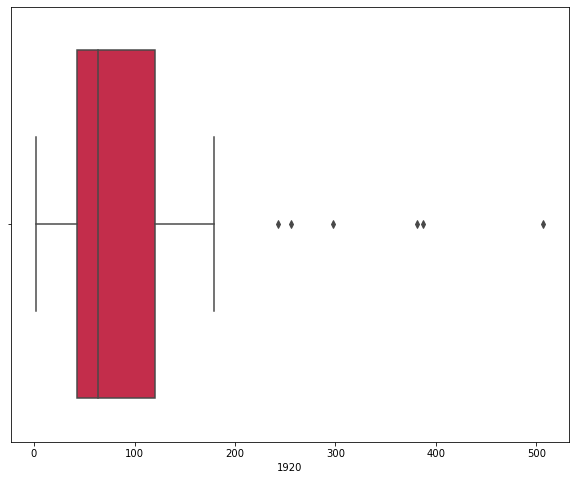

1930


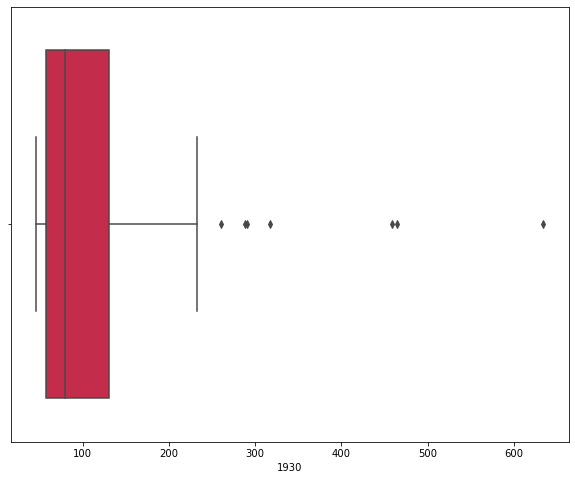

In [97]:
for i in df.columns:
    print(i)
    plt.figure(figsize=(10,8))
    sns.boxplot(x= df[i], color='crimson')
    plt.show()

1920


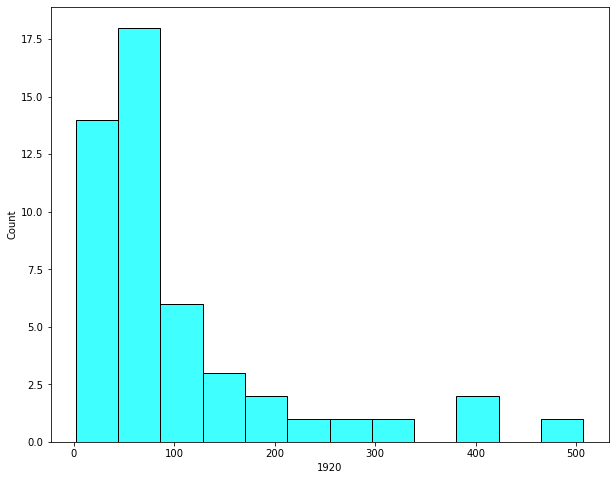

1930


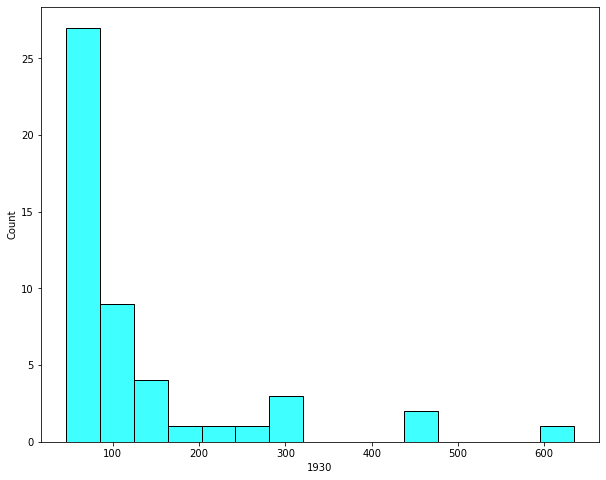

In [98]:
for i in df.columns:
    print(i)
    plt.figure(figsize=(10,8))
    sns.histplot(x= df[i],color='cyan')
    plt.show()

# 3b. Measure spread – variance and standard deviation

In [99]:
for i in df.columns:
    print('Range of_',i,':' ,df[i].max()-df[i].min())

Range of_ 1920 : 505
Range of_ 1930 : 588


In [100]:
for i in df.columns:
    print(f'The Variance for the year  {i} is {round(df[i].var(),2)}')
    print(f'The Standard Deviation for the year {i} is {round(df[i].std(),2)}')

The Variance for the year  1920 is 10900.42
The Standard Deviation for the year 1920 is 104.41
The Variance for the year  1930 is 15158.83
The Standard Deviation for the year 1930 is 123.12


In [ ]:
# Lets see the skewness and kurtosis along with the spread of the data

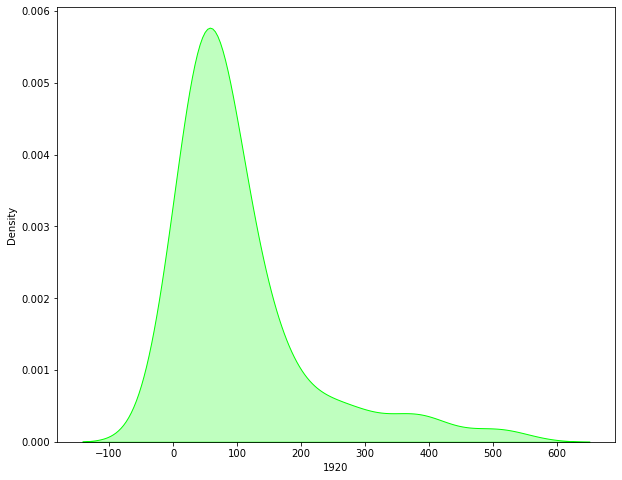

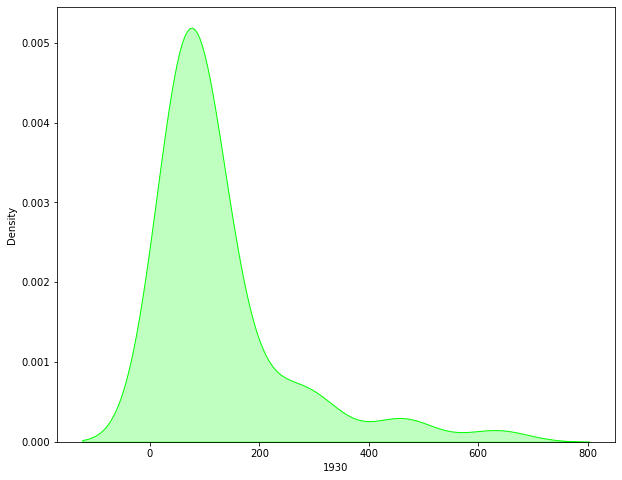

In [101]:
for i in df.columns:
    plt.figure(figsize=(10,8))
    sns.kdeplot(df[i], shade=True, color='lime')
    plt.show()

In [102]:
for i in df.columns:
    print(f'The Skewness of {i} is {df[i].skew()}')
    print(f'The Kurtosis of  {i} is {df[i].kurt()}')

The Skewness of 1920 is 2.255275603839222
The Kurtosis of  1920 is 5.141244719238257
The Skewness of 1930 is 2.4929020374730873
The Kurtosis of  1930 is 6.476670890698667


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

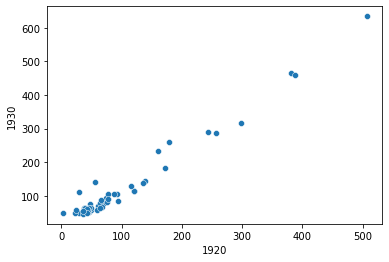

In [103]:
sns.scatterplot(x = df[1920],y=df[1930],data=df)
plt.show()

Inference:-

Here both the population for the year 1920 and 1930(i.e. x and y variables)  and positively correlated and have linear realtionship

In [104]:
df.corr()

,1920,1930
1920,1.000000,0.981742
1930,0.981742,1.000000


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

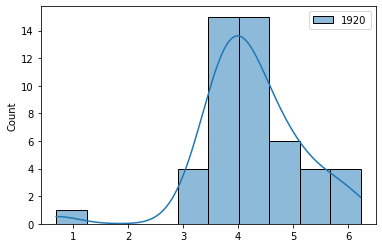

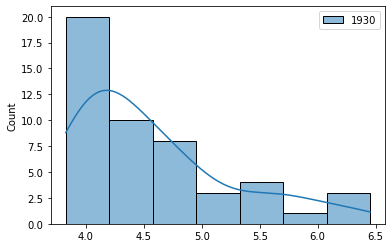

In [113]:
X = np.log(df[[1920]])
y = np.log(df[[1930]])


sns.histplot(X, kde=True)
plt.show()

sns.histplot(y,kde=True)
plt.show()

Inference:

After applying log transformation the skewness of both X and y variables reduced, but there are a very few aoutliers present. Since, the dataset is small we can choose not to remove them

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [109]:
df.isnull().sum()

1920    0
1930    0
dtype: int64

In [112]:
X.corr(y)

0.8425857817236512

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [115]:
print('The shape of X_train', X_train.shape)
print('The shape of X_test', X_test.shape)
print('The shape of y_train', y_train.shape)
print('The shape of y_test', y_test.shape)

The shape of X_train (39, 1)
The shape of X_test (10, 1)
The shape of y_train (39, 1)
The shape of y_test (10, 1)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [116]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [117]:
pd.DataFrame(lr.coef_, index=X_train.columns ,columns=['Coeffs'])

,Coeffs
1920,0.581035


In [118]:
pd.DataFrame(lr.intercept_, index=X_train.columns ,columns=['Intercept'])

,Intercept
1920,2.104419


Best Fit line LR equation: '1930' = (0.581035*1920) + 2.104419, i.e. with unit change in 'x', 'y' is going to change by 0.581035 units

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

In [119]:
y_train_pred = lr.predict(X_train)
y_test_pred= lr.predict(X_test)

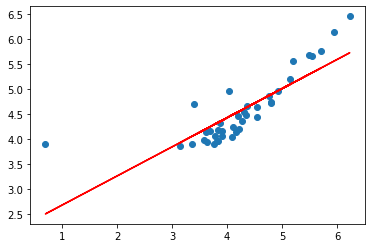

In [122]:
plt.scatter(X_train,y_train)
plt.plot(X_train, y_train_pred, color='r')
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [124]:
r_squared = r2_score(y_test,y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))

print('The R-Squared: ', r_squared)
print('The Root Mean Squared Error value: ', rmse)

The R-Squared:  0.8403131978929576
The Root Mean Squared Error value:  0.27345883026437434


Inference:

About 84.03% of the variance in y is explained by X variables. Average error in the predicted as compared to the original values is 0.27345883026437434 

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [125]:
print('Accuracy Score for trained data: ', lr.score(X_train, y_train))
print('Accuracy Score for test data: ', lr.score(X_test, y_test))

Accuracy Score for trained data:  0.6700765708761833
Accuracy Score for test data:  0.8403131978929576


Inference:-

From the above results we can infere that there is a low bais and high variance after comparing the R_squared values of the 
train and test data
